In [2]:
import geopandas as gpd
import os 
import numpy as np
import pandas as pd

In [10]:
#LIMITE_DEPARTAMENTAL_INEI_geogpsperu
os.chdir('C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/inputs/shape_files/LIMITE_DEPARTAMENTAL_INEI_geogpsperu')
gdf = gpd.read_file("LIMITE_DEPARTAMENTAL_INEI_geogpsperu.shp")
gdf_1=gdf.iloc[:,[0,1,2,-1]].copy()
gdf_1


,OBJECTID,CCDD,DEPARTAMEN,geometry
0,1.0,01,AMAZONAS,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2.0,02,ANCASH,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."
2,3.0,03,APURIMAC,"POLYGON ((-73.74655 -13.17442, -73.7457 -13.17..."
3,4.0,04,AREQUIPA,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,5.0,05,AYACUCHO,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758..."
5,6.0,06,CAJAMARCA,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629..."
6,7.0,07,CALLAO,"POLYGON ((-77.13504 -11.8182, -77.13484 -11.81..."
7,8.0,08,CUSCO,"POLYGON ((-72.9728 -11.25189, -72.97134 -11.25..."
8,9.0,09,HUANCAVELICA,"POLYGON ((-74.57118 -11.9871, -74.57095 -11.98..."
9,10.0,10,HUANUCO,"POLYGON ((-75.992 -8.32108, -75.99015 -8.32171..."


In [4]:
gdf_1 = gdf_1.to_crs(epsg=32718)

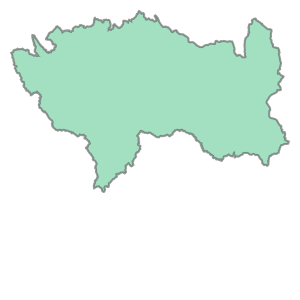

In [5]:
gdf_1.geometry[11]

In [6]:
gdf_1.columns

Index(['OBJECTID', 'CCDD', 'DEPARTAMEN', 'geometry'], dtype='object')

In [7]:
# Usaremos el centroide de Lima para medir distancias
lima_geom = gdf_1[gdf_1["DEPARTAMEN"] == "LIMA"].geometry.iloc[0].centroid
gdf_1["distancia_a_Lima_m"] = gdf_1.centroid.distance(lima_geom)

In [8]:
gdf_1

,OBJECTID,CCDD,DEPARTAMEN,geometry,distancia_a_Lima_m
0,1.0,01,AMAZONAS,"POLYGON ((187171.705 9668803.603, 187079.575 9...",759361.079695
1,2.0,02,ANCASH,"POLYGON ((208241.924 9109135.125, 208250.704 9...",286688.693209
2,3.0,03,APURIMAC,"POLYGON ((635840.054 8543237.005, 635931.886 8...",467753.018088
3,4.0,04,AREQUIPA,"POLYGON ((825222.767 8379255.113, 825238.224 8...",634989.053680
4,5.0,05,AYACUCHO,"POLYGON ((570884.792 8654006.419, 570714.032 8...",375604.239746
5,6.0,06,CAJAMARCA,"POLYGON ((89294.037 9487418.582, 89536.283 948...",636469.504083
6,7.0,07,CALLAO,"POLYGON ((267376.741 8692661.495, 267398.876 8...",56822.333224
7,8.0,08,CUSCO,"POLYGON ((721311.678 8755404.074, 721471.341 8...",508894.020358
8,9.0,09,HUANCAVELICA,"POLYGON ((546683.997 8674836.082, 546708.827 8...",223829.680276
9,10.0,10,HUANUCO,"POLYGON ((390764.806 9080069.327, 390968.249 9...",270047.004757
